# CNN PHÂN BIỆT 4 LOẠI BÁNH
PHẠM NGỌC SƠN-19146045



In [13]:
# PHÂN BIỆT 4 LOẠI BÁNH XÈO,BÁNH HỎI,BÁNH ƯỚT, BÁNH DA LỢN
#MỖI LOẠI 20 ẢNH KÍCH THƯỚC 150X150 TRAIN SAU ĐÓ UP LÊN GITHUB 
# PHẠM NGỌC SƠN  MSSV:19146045
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
data_train='/content/drive/MyDrive/Colab Notebooks/BANHNHANGIANVIETNAM/TRAIN'
data_validation='/content/drive/MyDrive/Colab Notebooks/BANHNHANGIANVIETNAM/TEST'
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
traindata=train.flow_from_directory(data_train,
                                    target_size=(150,150),
                                    batch_size=10,
                                    class_mode='categorical',)
validationdata=validation.flow_from_directory(data_validation,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',)

Found 80 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [4]:
print(traindata.class_indices)
print(validationdata.class_indices)

{'BANH_DA_LON': 0, 'BANH_HOI': 1, 'BANH_UOT': 2, 'BANH_XEO': 3}
{'BANH_DA_LON': 0, 'BANH_HOI': 1, 'BANH_UOT': 2, 'BANH_XEO': 3}


In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(traindata,batch_size=10,epochs=20,verbose=1,validation_data=validationdata)

Epoch 1/20
8/8 [==============================] - 31s 4s/step - loss: 2.6676 - accuracy: 0.3500 - val_loss: 1.2469 - val_accuracy: 0.4048
Epoch 2/20
8/8 [==============================] - 6s 762ms/step - loss: 1.3773 - accuracy: 0.3875 - val_loss: 1.1588 - val_accuracy: 0.8333
Epoch 3/20
8/8 [==============================] - 6s 696ms/step - loss: 1.6490 - accuracy: 0.6000 - val_loss: 0.9095 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 6s 694ms/step - loss: 0.7904 - accuracy: 0.6250 - val_loss: 0.6468 - val_accuracy: 0.7857
Epoch 5/20
8/8 [==============================] - 6s 698ms/step - loss: 1.1471 - accuracy: 0.6250 - val_loss: 0.8068 - val_accuracy: 0.6190
Epoch 6/20
8/8 [==============================] - 6s 697ms/step - loss: 0.3618 - accuracy: 0.8625 - val_loss: 0.5526 - val_accuracy: 0.8571
Epoch 7/20
8/8 [==============================] - 6s 704ms/step - loss: 0.1562 - accuracy: 0.9625 - val_loss: 0.4231 - val_accuracy: 0.7619
Epoch 8/20
8/8 [======

array([0])

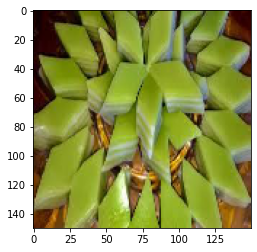

In [9]:
img=load_img('/content/DALON.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])

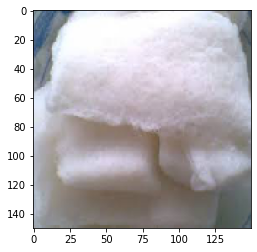

In [10]:
img=load_img('/content/BANHHOI.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([3])

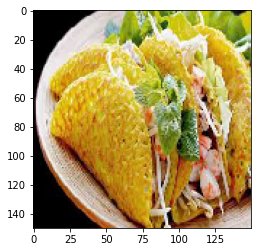

In [11]:
img=load_img('/content/BANHXEO.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([2])

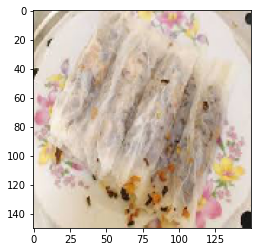

In [12]:
img=load_img('/content/BANHUOT.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)